In [ ]:
#machine learning models in each type

In [ ]:
#1. error based learning- linear regression

In [14]:
#read the organized file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('abt.csv', index_col=0)
df1 = pd.read_csv('features.csv', index_col=0)

In [15]:
#linear regression
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 26848 to 27219
Data columns (total 10 columns):
country            372 non-null object
year               372 non-null int64
sex                372 non-null object
age                372 non-null object
suicides_no        372 non-null int64
population         372 non-null int64
suicidesper100k    372 non-null float64
gdp_for_year       372 non-null object
gdp_per_capita     372 non-null int64
generation         372 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 32.0+ KB


,country,year,sex,age,suicides_no,population,suicidesper100k,gdp_for_year,gdp_per_capita,generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,"4,346,734,000,000",19693,Generation X


In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [17]:
#Create the X & Y Variables
X = df['year'].values.reshape(-1,1)
y = df['suicidesper100k'].values.reshape(-1,1)

In [18]:
#Create the training a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[233.34588455]
[[-0.1096711]]


In [21]:
y_pred = regressor.predict(X_test)

In [31]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df2

,Actual,Predicted
0,3.60,14.442367
1,1.14,14.442367
2,0.63,13.235985
3,57.85,15.100394
4,22.76,12.906972
5,23.64,14.332696
6,28.51,15.319736
7,23.44,14.223025
8,25.02,14.990723
9,5.18,13.564998


In [45]:
df.suicidesper100k.value_counts()
df.year.value_counts()

2015    12
1999    12
1986    12
1987    12
1988    12
1989    12
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
2000    12
2014    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
1985    12
Name: year, dtype: int64

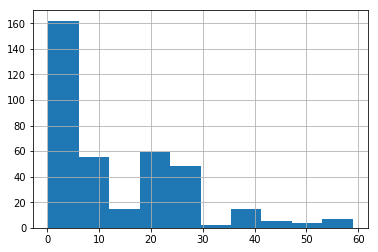

In [43]:
#show histogram fro suicide rate
df.suicidesper100k.hist()

In [44]:
#print error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.708722585899041
Mean Squared Error: 150.38291397460804
Root Mean Squared Error: 12.26307114774305


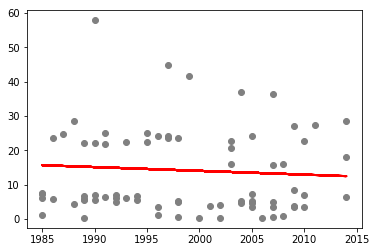

In [30]:
#Plot the residuals
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

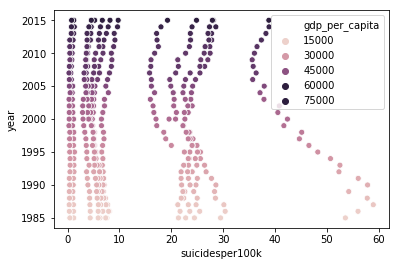

In [48]:
 #per linear regression above, the suicide rate in the us has almost stayed constant or reduced over the years
sns.scatterplot(
    x='suicidesper100k',
    y='year',
    hue = 'gdp_per_capita',
    data=df)

In [ ]:
#2 kNN

In [50]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100k', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [52]:
#Create the X & Y Variables
X = df['year'].values.reshape(-1,1)
y = df['suicidesper100k'].values.reshape(-1,1)

In [53]:
#Create the training a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[233.34588455]
[[-0.1096711]]


In [56]:
y_pred = regressor.predict(X_test)

In [57]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df2

,Actual,Predicted
0,3.60,14.442367
1,1.14,14.442367
2,0.63,13.235985
3,57.85,15.100394
4,22.76,12.906972
5,23.64,14.332696
6,28.51,15.319736
7,23.44,14.223025
8,25.02,14.990723
9,5.18,13.564998


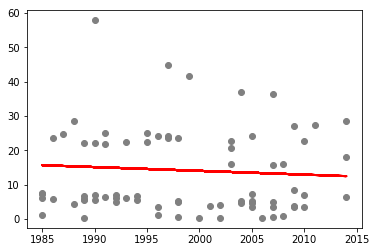

In [58]:
#Plot the residuals
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
# similarity based learning model
# using knn

import numpy as np #Numpy for working with your data as an array
import pandas as pd #Pandas for working with your data as a dataframe
from sklearn import preprocessing #preprocessing is used to normalize the data
from sklearn.model_selection import train_test_split #train test split is used for preprocessing

In [ ]:
from matplotlib import pyplot as plt #matplotlib for visualization functions 
import seaborn as sns #seaborn for visualization functions

In [ ]:
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier is the decision tree classification function
from sklearn.ensemble import RandomForestClassifier #RandomForestClassifier is the random forest classification functionality
from sklearn.neighbors import KNeighborsClassifier #KNeighborsClassifier is the KNN classification functionality

In [ ]:
from sklearn import metrics #metrics allows us to prints the model's accuracy score
from sklearn.metrics import confusion_matrix #confusion_matrix allows us to print accuracy details about our model

In [62]:
#normalize data 
#normalized data
import pandas as pd
from sklearn import preprocessing

x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

In [63]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [77]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5) 

NameError: name 'sklearn' is not defined

In [65]:
test_knn

NameError: name 'test_knn' is not defined

In [ ]:
# 3.  Random Forest Classifier

In [75]:
# random forest classifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

ValueError: Unknown label type: 'continuous'